Advanced Machine Learning Lab

Plot la colonne "Close" des deux fichiers en focntion de la date.

<ipython-input-3-86295244349a>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df1_monthly = df1.resample('M', on='Date').first()
<ipython-input-3-86295244349a>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2_monthly = df2.resample('M', on='Date').first()


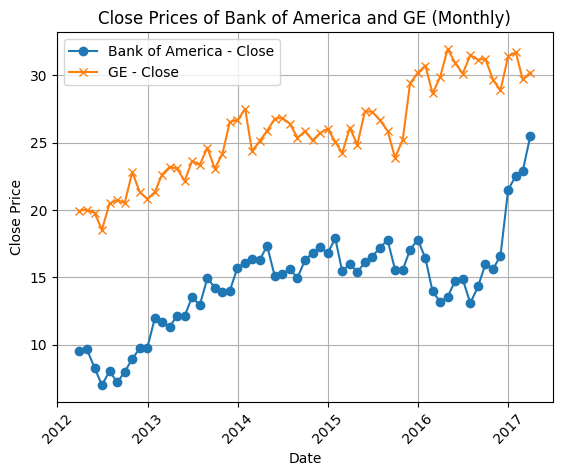

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np


df1 = pd.read_csv('bank_of_america.csv', delimiter=';')
df2 = pd.read_csv('ge.csv', delimiter=';')

df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

df1_monthly = df1.resample('M', on='Date').first()
df2_monthly = df2.resample('M', on='Date').first()

plt.plot(df1_monthly.index, df1_monthly['Close'], label='Bank of America - Close', marker='o')
plt.plot(df2_monthly.index, df2_monthly['Close'], label='GE - Close', marker='x')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of Bank of America and GE (Monthly)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


Implémentation du Q-learning

Day 0: Action=1, Cash=4904.7, Shares=10, Portfolio Value=5000.4
Day 1: Action=0, Cash=4904.7, Shares=10, Portfolio Value=5001.5
Day 2: Action=0, Cash=4904.7, Shares=10, Portfolio Value=4999.599999999999
Day 3: Action=1, Cash=4809.8, Shares=20, Portfolio Value=4993.8
Day 4: Action=0, Cash=4809.8, Shares=20, Portfolio Value=4994.400000000001
Day 5: Action=0, Cash=4809.8, Shares=20, Portfolio Value=4988.400000000001
Day 6: Action=2, Cash=4899.1, Shares=10, Portfolio Value=4984.5
Day 7: Action=0, Cash=4899.1, Shares=10, Portfolio Value=4987.700000000001
Day 8: Action=0, Cash=4899.1, Shares=10, Portfolio Value=4990.8
Day 9: Action=0, Cash=4899.1, Shares=10, Portfolio Value=4985.900000000001
Day 10: Action=0, Cash=4899.1, Shares=10, Portfolio Value=4987.0
Day 11: Action=0, Cash=4899.1, Shares=10, Portfolio Value=4988.3
Day 12: Action=0, Cash=4899.1, Shares=10, Portfolio Value=4988.3
Day 13: Action=1, Cash=4809.900000000001, Shares=20, Portfolio Value=4985.3
Day 14: Action=0, Cash=4809.900000

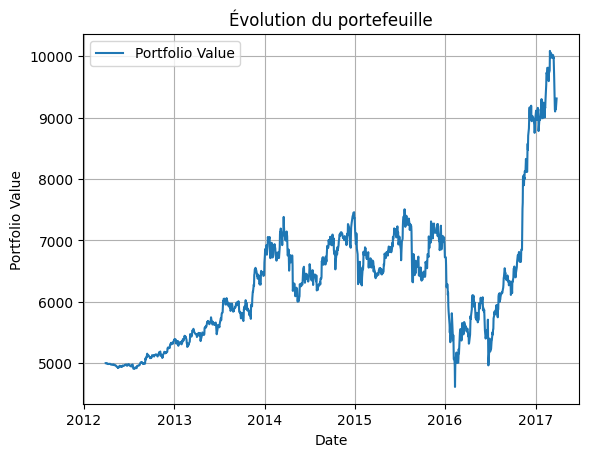

In [ ]:
def q_learning_trading(df, initial_cash=5000, transaction_size=10, alpha=0.1, gamma=0.95, epsilon=0.5):

    q_table = {}  #initialisation de la Qtable
    cash = initial_cash
    num_shares = 0
    portfolio_value = cash
    portfolio_history = []

    for i in range(len(df) - 1):
        current_price = df['Close'][i]
        next_price = df['Close'][i + 1]

        #def état
        state = (cash, num_shares)

        #initialisation de la Q-table pour un nouvel état
        if state not in q_table:
            q_table[state] = [0, 0, 0]  #Qvalues pour (hold, buy, sell)

        #choix de l'action
        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2])  #explore

        else:
            action = np.argmax(q_table[state])  #exploitation

        #executer action
        if action == 1 and cash >= transaction_size * current_price:  #buy
            num_shares += transaction_size
            cash -= transaction_size * current_price

        elif action == 2 and num_shares >= transaction_size:  #sell
            num_shares -= transaction_size
            cash += transaction_size * current_price


        #reward calcul
        future_portfolio_value = cash + num_shares * next_price
        reward = future_portfolio_value - portfolio_value  #gain/pertes
        portfolio_value = future_portfolio_value  #maj valeur porte feuille

        #definition du nouvel état
        next_state = (cash, num_shares)

        #initialiser Q-table pour le nouvel état si nécessaire
        if next_state not in q_table:
            q_table[next_state] = [0, 0, 0]

        #maj la Qtable selon Bellman
        q_table[state][action] = (1 - alpha) * q_table[state][action] + alpha * (reward + gamma * max(q_table[next_state]))

        #enregistrement evo portefeuille
        portfolio_history.append(portfolio_value)


        print(f"Day {i}: Action={action}, Cash={cash}, Shares={num_shares}, Portfolio Value={portfolio_value}")

    return portfolio_history, q_table


#utilisation de la fonction avec la bank of america
portfolio_history, q_table = q_learning_trading(df1)

#affichage du graphique d'évolution du portefeuille
plt.plot(df1['Date'][:-1], portfolio_history, label="Portfolio Value")
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Évolution du portefeuille')
plt.legend()
plt.grid()
plt.show()


# Test on general elctric

In [ ]:
def test_q_learning_trading(df, q_table, initial_cash=5000, transaction_size=10, alpha=0.1, gamma=0.95, epsilon=0.5):
    cash = initial_cash
    num_shares = 0
    portfolio_value = cash
    portfolio_history = []
    actions_history = []

    for i in range(len(df) - 1):
        current_price = df['Close'][i]
        next_price = df['Close'][i + 1]

        #define the state
        state = (cash, num_shares)

        #if the state exists in the Q-table, take action based on exploitation
        if state in q_table:
            action = np.argmax(q_table[state])  #exploit the learned Q-values
        else:
            action = random.choice([0, 1, 2])  #random action if state is  not founded

        #perform the action
        if action == 1 and cash >= transaction_size * current_price:  # Buy
            num_shares += transaction_size
            cash -= transaction_size * current_price

        elif action == 2 and num_shares >= transaction_size:  # Sell
            num_shares -= transaction_size
            cash += transaction_size * current_price


        #calculate reward
        future_portfolio_value = cash + num_shares * next_price
        reward = future_portfolio_value - portfolio_value
        portfolio_value = future_portfolio_value

        #store the portfolio history and actions
        portfolio_history.append(portfolio_value)
        actions_history.append(action)

    return portfolio_history, actions_history

#test the Q-learning algorithm on general electric
portfolio_history_ge, actions_history_ge = test_q_learning_trading(df2, q_table)



# Plot the portfolio value over time for general electric

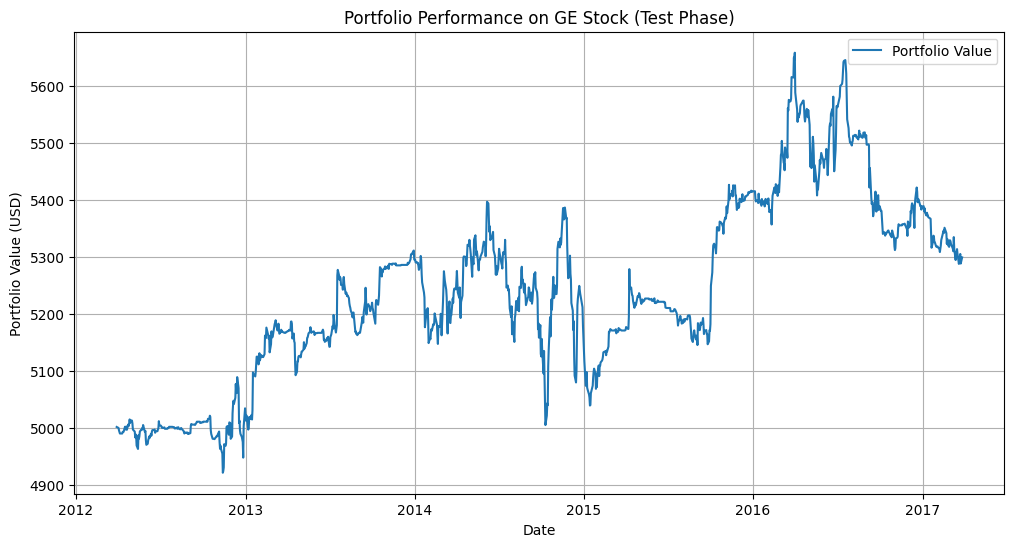

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df2['Date'][:-1], portfolio_history_ge, label="Portfolio Value")
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.title('Portfolio Performance on GE Stock (Test Phase)')
plt.legend()
plt.grid()
plt.show()

# Plot of our actions

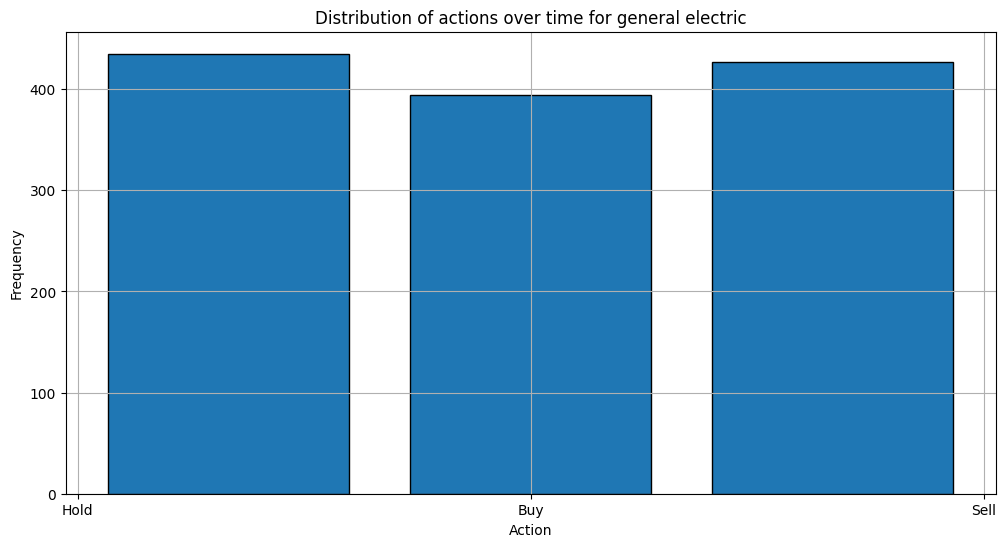

In [ ]:
plt.figure(figsize=(12, 6))

plt.hist(actions_history_ge, bins=3, edgecolor='black', rwidth=0.8)
plt.xticks([0, 1, 2], ['Hold', 'Buy', 'Sell'])
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Distribution of actions over time for general electric')
plt.grid(True)
plt.show()


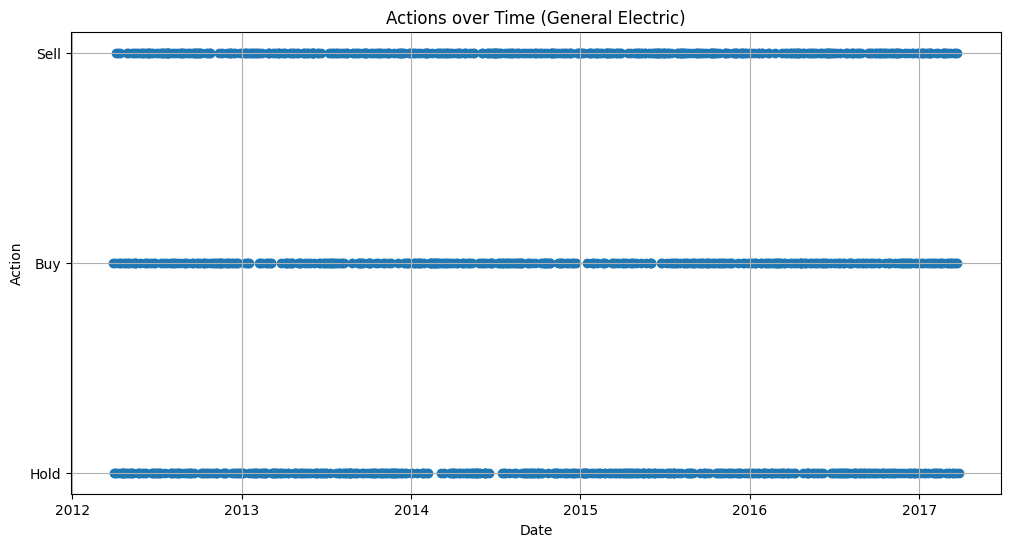

In [ ]:
# Using a scatter plot

plt.figure(figsize=(12, 6))
plt.scatter(df2['Date'][:-1], actions_history_ge)
plt.xlabel('Date')
plt.ylabel('Action')
plt.title('Actions over Time (General Electric)')
plt.yticks([0, 1, 2], ['Hold', 'Buy', 'Sell'])
plt.grid(True)
plt.show()


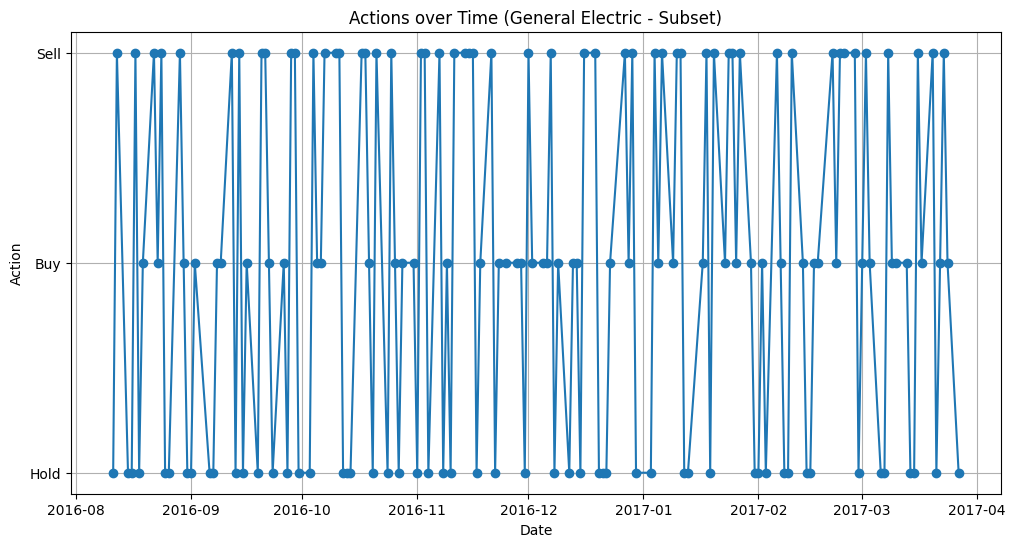

In [ ]:
subset_size = len(df2) // 8
subset_dates = df2['Date'][:-1][-subset_size:]
subset_actions = actions_history_ge[-subset_size:]

plt.figure(figsize=(12, 6))
plt.plot(subset_dates, subset_actions, marker='o', linestyle='-')  # Use plot for line connection

plt.xlabel('Date')
plt.ylabel('Action')
plt.title('Actions over Time (General Electric - Subset)')
plt.yticks([0, 1, 2], ['Hold', 'Buy', 'Sell'])
plt.grid(True)
plt.show()
